# Emergence of Linguistic Structure from Information Processing Constraints

In [5]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


### Human Language as an Efficient Code

Why does human language have the particular form it does? Here we postulate that the phonological, syntactic, and semantic-compositional structure of human language arises as a consequence of real-time information processing constraints operative in the production and comprehension of language by humans. 

The idea is that human language is an efficient code for communicating meanings in the information theoretic sense, subject to certain constraints. When you optimize to find the most efficient code subject to the information processing constraints, you get multiple solutions (or possibly multiple local optima). Those multiple solutions are the human languages: English, French, Chinese, etc.

Let's think of a language $L$ as a stochastic mapping from a **message** $m$ to an **utterance** $u$. Let $M$ be a distribution over messages, and $U$ be the distribution over utterances obtained by drawing samples $m \sim M$ and running them through $L$. The useful information conveyed by the language, measured in bits, is the mutual information between utterances and messages:

$I[U:M] = < \log \frac{p(m|u)}{p(m)} >,$

where $<x>$ represents the expectation of $x$. Therefore the best languages (which convey the most information about messages) are solutions to the optimization problem:

$\arg\max_L I[U:M]$.

In the real world, we don't want to optimize only information conveyed; we also want to minimize the effort expended using the language. Therefore we solve the constrained optimization problem:

$\arg\max_L I[U:M] - \lambda C(U)$,

where $C(U)$ represents the expected **cost** of an utterance---the joint effort involved in producing, transmitting, and comprehending utterances. The scalar $\lambda$ is a trade-off parameter specifying how many units of cost are worth it to transmit 1 bit of information. Typically in information theory, cost is measured in utterance length. Here we consider a more generalized notion of cost.

Our proposal is that when the cost function appropriately encodes the information processing constraints that affect human communication, the solutions to the equation above will yield distributions over utterances given messages that resemble human languages.


#### Control Problems Inherent to Language Use

By information-processing constraints I mean constraints on on-line language production and comprehension. I'll focus on the production side because I think production constraints are more severe than comprehension constraints. 

The main problem in language production is that your brain has to coordinate the muscle fibers in your vocal tract to produce an extraordinarily complex sequence of motions which encode an abstract meaning. The problem of coordinating a system with multiple components to produce predictable behavior is called a **control problem**, studied extensively in the fields of Control Theory and Robotics. 

The control problem involved in human language production is enormously complex and we are not especially good at it, possibly because spoken language evolved recently. Evidence:

* Disorders of speech production, such as stuttering and phonological speech impediments, are extremely common. 

* Even among the most fluent speakers, errors in speech such as false starts and disfluencies are common.

* Fitch (2018) surveys the recent literature on evolutionary adaptation to language in humans, and finds that the only physiological adaptation to language is the existence of direct neurological connections between the motor cortex and the vocal tract. These connections are absent in all other animals. The existence of these connections, and the fact that they are the only observable adaptations for language, suggest that the motor control problem involved in human speech is the hardest part of using language, and is thus the source of the most major constraints on human languages. 

So I think the appropriate constraints on human language will come in the form of constraints on the motor control problem involved in speech production. There is a limit to the complexity of sequences we can produce with our vocal tracts. 

It is also possible to formulate language comprehension as a control problem.

#### Control and Information Processing

What do control problems have to do with information processing? An exciting synthesis has recently emerged in the control theory and robotics literature is that the complexity of a control problem can be considered information-theoretically. 

Suppose there is a distribution $G$ of **goals** that a robot wants to accomplish, and that the robot has a **action policy** $\pi$, which is a stochastic function from goals $G$ to **actions** $A$. That is, the policy is a conditional distribution of actions given goals, $A|G$. Then the general complexity of the control problem is given by $I[A:G]$: the amount of information about the goal required to select the correct action. We imagine that $G$ and $A$ are two computational nodes, and $G$ is sending information to $A$ at a particular rate of units of cost per bit of information. A policy that requires a huge number of bits to be sent from $G$ to $A$ is complex. A policy that only requires a few bits to be sent from $G$ to $A$ is simple. 

Suppose an agent is trying to find a policy $\pi$ that maximizes its reward under the complexity of the control problem. We can formulate such an objective function for $\pi$ (to be maximized) as:

$ J(\pi) = U(A,G) - \lambda I[A:G]$,

where $U(A,G)$ is the expected **utility** of actions given goals, and $\lambda$ is a scalar trade-off parameter. Maximizing this function, an agent might sometimes choose a policy which is sub-optimal with respect to the utility, but which has a lower information processing cost. The very best policy for maximizing utility might have prohibitively high information processing cost. 

The formulation above yields a number of results which are exciting from the perspective of predicting the behavior of humans and animals. Genewein et al. (2015) show that policies maximizing the function above generally induce **hierarchical** representations of the environment and of behavioral goals, a noted property of human representations. Van Dijk and Polani (2013) show that agents following the objective above tend to develop behavior which is **ritualized**, meaning that they tend to repeat the same actions in the same environments, even when these action are sub-optimal with respect to their current goals. They also find that agents under this objective will typically only read a few bits of information about their goal per timestep: only those bits that are important in their current state. For example, in a task of navigating through rooms, while an agent is in a room it only reads the bits from $G$ that tell it which door in the room to head towards.

In general, action policies resulting from the minimization of $J$ above have the property that they lack flexibility---they prefer action policies that involve performing the same actions regardless of the current goal.

Here is an example. Suppose you drive home a particular route every evening. Then usually when you are driving home, you are deciding where to turn based on your particular local goal $g_\text{go home}$. Let's say $g_\text{go home}$ can be represented as a series of bits $01111011101$. Every time you decide where to turn, you have to look at some of those bits in $g_\text{go home}$ to determine your action $a_\text{turn left}$ or $a_\text{turn right}$. 

Now suppose that you are driving a friend home and are going to drop them off at their house before proceeding to your own house. Now when you are driving your friend home, you are under the influence of a different local goal than usual: $g_\text{drop off friend}$. Suppose you're deep in conversation with your friend and not paying careful attention to your driving. In this situation, you might find that you turned right when you should have turned left. Usually, those wrong turns will be the ones you *would have taken* if you were following $g_\text{go home}$. In this case, your action policy lacked flexibility: you should have read a bit from $g_\text{drop off friend}$ to determine you should turn left, but instead you turned right because that is what you usually did under the much more frequent goal $g_\text{go home}$. 

If you reflect on everyday small mistakes, you will find that they often have this flavor: there is something you should do given a very particular goal, but instead you end up doing something that you would have done under some other, more-frequent goal. 

In general, maximization of $J$ will result in policies where:
* When the policy selects actions that are sub-optimal wrt the utility, those actions are usually actions that the agent would take under some other more frequent goal.
* Action policies with a high degree of similarity across different goals will be preferred.
* The policy will be less efficient for less frequent goals.
* The policy is soft: it does not involve hard rules determining behavior, but rather probability distributions. 

This "inflexibility" of complexity-penalized policies seems correct for modeling human language. Human language is about 60% redundant per word in terms of information, indicating a great deal of repeating substructure. We also describe things in similar ways even when they are not so similar. When I say "lift a cup" and "lift a barbell", the actual physical actions involved are extremely different and they are only similar at a very abstract level. But by categorizing both actions as "lift", I get to re-use the part of my speech production action policy that produces the phonemes /lift/. Some precision/efficiency is lost, but at the gain that the language is easier to produce.

#### Control problem of language production

In the simplest analysis, language production is a dual control problem. At each timestep, you must decide which actuators in your vocal tract to move next. This decision is based on two factors:
* The **articulatory goal**: The word you are trying to say, or the message you are ultimately trying to convey.
* The **speech context**: What you have already said so far.

For example, suppose you're trying to say the word cat. The space of possible actions you can output is the set of all articulable phonemes. You have to produce three phonemes in order: /k/ + /æ/ + /t/. Suppose your articulatory goal is fully characterized by $g_\text{cat}$, meaning your goal is to produce this particular word. And suppose you have said nothing so far.

In the first timestep, conditional on $g_\text{cat}$ and the empty context $\epsilon$, you must choose to produce /k/. In the second timestep, conditional on $g_\text{cat}$ and on the context /k/, you must choose to produce /æ/. You have to condition on the context because if you only considered $g_\text{cat}$, you might produce /k/ again. (And note that repeating sounds, especially at the beginnings of words, is an extraordinarily common speech error, and is characteristic of stuttering.) Now finally, conditional on $g_\text{cat}$ and the context /kæ/, you must choose to produce /t/.

Letting $A$ be the set of actions (phonemes to be produced), $G$ be the set of articulatory goals, and $S$ be the set of speech contexts, an agent must learn a policy $\pi : G \times S \rightarrow A$.

The control problem is schematized below.


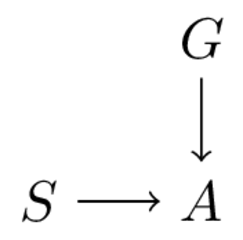

In [20]:
%%tikz 

\node (A) {$A$};
\node (G) [above of=A] {$G$};
\node (S) [left of=A] {$S$};
\path[->] (G) edge (A);
\path[->] (S) edge (A);

The complexity-penalized objective for the policy is thus, in its most general form:

$J(\pi) = U(A,S,G) - \lambda_S I[A:S] - \lambda_G I[A:G] - \lambda_{SG} \text{Syn}[A:G:S],$

where $\text{Syn}[A:G:S] = I[A:G|S] - I[A:G] = I[A:S|G] - I[A:S]$ is the **synergy** of $A$, $G$, and $S$, representing the amount of information that $G$ and $S$ provide jointly about $A$ above and beyond the information that each of them provides in isolation. The three $\lambda$ parameters represent the difficulty of integrating three kinds of information: $\lambda_S$ is the difficulty of integrating information about the speech context, $\lambda_G$ is the difficulty of integrating information about the articulatory goal, and $\lambda_{SG}$ is the difficulty of integrating both simultaneously.

In general, intuitively, if $\lambda_S$ is much smaller than the other $\lambda$s, then the agent will produce sequences that have a high degree of similarity across different articulatory goals. 

There are other possible information processing constraints involved, and other variables, such as the fact that the agent must remember $S$ in a limited-capacity working memory. This is probably necessary to derive locality constraints in natural language. We will address the constraints later. 

### Optimal Languages under Information Processing Constraints

An optimal language will be useful for communication even when the agents that are using the language are subject to information processing constraints as described above. Considering a language as a mapping from messages $m$ to sequences of symbols $\textbf{u}$, this mapping should not induce unnecessarily high $I[A:S]$, $I[A:G]$, and $Syn[A:G:S]$. Therefore optimal languages will have a lot of repeating substructure.

### Targets of Explanation

This project is somewhat open-ended in that there are a number of aspects of language we could potentially explain in this way. Once we have working models, we can figure out what are good targets of explanation.

Some properties of human language that I think would be amenable to explanation in this way:
* The set of phonemes used in any language is much smaller than the set of all pronounceable phonemes used in all languages.
* The set of phonemes in a language has a lot of repeated substructure in terms of phonetic features.
* The set of phonemes in a language is maximally acoustically distinct.
* Languages usually have on the order of $10^1$ phonemes and on the order of $10^4$ morphemes: invariant sequences of phonemes which correspond to atomic components of the meaning of an utterance. 
* Morphemes vary in length (what distribution?).
* Morphemes contain a great deal of repeated substructure (phonotactics).
* Phonotactics and phonology are formally characterizable as $k$-tier-based strictly local languages with $k=2$.
* Sometimes the repeated substructures convey meanings in a soft way (phonaesthemes).
* Utterances consist of sequences of multiple morphemes (how many morphemes per sentence?).
* Utterances vary in length.
* The overall meaning of an utterance is compositional: it is a simple function of the meanings of the morphemes and their order.
* There is an unbounded number of possible utterances. The cardinality of possible utterances is $\aleph_0$.
* Utterances have tree-like hierarchical structure: one word composes typically with one other word. That is, when the meaning of a word is context-dependent, then it is usually dependent on only one other word in the utterance. This property is called endocentricity.
* The tree-like hierarchical structures of utterances are characterizable as Multiple Context Free Grammars with block degree $\sim3$.
* The tree-like hierarchical structures of utterances are characterizable as $k$-tier-based strictly local tree languages with $k=2$. (Note: I haven't carefully reviewed the literature on this, so I'm not sure that I believe it.)

These are facts ranging from low-level (phonology) to high-level (syntax and semantics). I suspect that the different generalizations at these levels might be explainable in terms of different values of $\lambda$.

The numbers $10^1$ phonemes, $10^4$ morphemes, and $\aleph_0$ sentences form a kind of hierarchy problem for linguistics. In contrast, animal communication systems have on the order of $10^1$ distinct signals with no meaningful substructure (but possibly a great deal of phonological substructure, e.g. in birdsong). DNA has $4$ "phonemes" (base pairs) and $4^3=64$ "morphemes" (codons) of fixed length (up to degeneracy of the third base pair), comprising (I think?) $\aleph_0$ proteins of varying length.

Presumably, these three systems---human language, animal communication systems, and DNA---can be recovered for different values of the $\lambda$ parameters.





### Structure of Goals

I'm arguing that the structure of language can be understood with reference to the information processing constraints that it is filtered through. Another option is that an important factor is the distribution over articulatory goals $G$ to be expressed in language, or equivalently, the distribution over messages encoded in utterances.

I think it's likely that the structure of $G$ will be important. But I am not dealing with it now because I don't know how to characterize it well. I suspect that $G$ can be very generic, and that most of our linguistic structure is determined by our information processing constraints, not by the structure of $G$. My reasoning is that we don't really see natural-language-like structures anywhere in nature except in symbolic systems invented by humans (such as programming languages).

## Neural Approach

We will represent languages as using neural networks as mappings from meanings to sequences. We will then find mappings to optimize objective functions such as those above.

It would also be possible to implement information-processing constraints directly by doing things like limiting the number of hidden units in the neural networks. This might work, but we would not have a clear way of interpreting the results. 